In [1]:
import torch
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter
from get_loader import get_loader
from model import CNNtoRNN

## We loaded the pretrained model on 100 epochs.

In [2]:
model = torch.load('image-captioning-model.pth')
model.eval()

CNNtoRNN(
  (encoderCNN): EncoderCNN(
    (inception): Inception3(
      (Conv2d_1a_3x3): BasicConv2d(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (Conv2d_2a_3x3): BasicConv2d(
        (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (Conv2d_2b_3x3): BasicConv2d(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (Conv2d_3b_1x1): BasicConv2d(
        (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      )
      (Conv2d_4a_3x3): BasicConv2d(
        (conv): Co

## Loading the dataset with getloader file and also using some transforms for image.

In [3]:
transform = transforms.Compose(
    [
        transforms.Resize((299, 299)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)

In [4]:
train_loader, dataset = get_loader(
        root_folder="flickr8k/images",
        annotation_file="flickr8k/captions.txt",
        transform=transform,
        num_workers=2,
    )

## Function to caption all images and display them

In [5]:
def caption_all_images(image_paths):
    count = 0
    for img_path in image_paths:
        count = count + 1
        print("Image ", count)
        plt.figure(figsize=(6,4))
        full_path = 'test_examples/' + img_path
        img = transform(Image.open(full_path).convert("RGB")).unsqueeze(0)
        caption = ' '.join(model.caption_image(img.to('cuda'), dataset.vocab)[1:-1])
        read_img = plt.imread(full_path)
        plt.imshow(np.real(read_img))
        plt.axis("on")
        plt.title(caption)
        plt.show()
        print("\n")

# Final Output:

Image  1


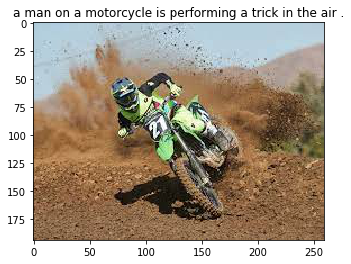



Image  2


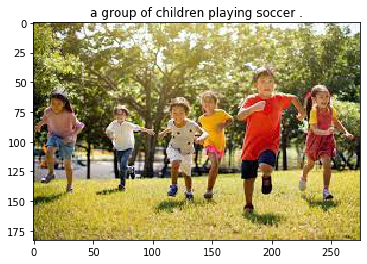



Image  3


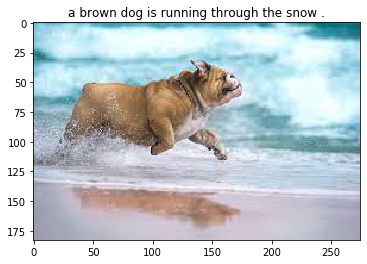



Image  4


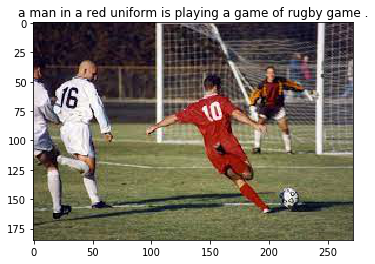



Image  5


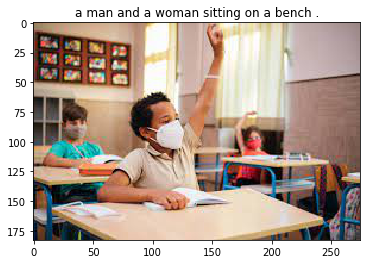

In [6]:
caption_all_images(os.listdir('test_examples'))

In [50]:

def get_lang_code(lang):
    if lang == "English":
        lang = "en"
    elif lang == "Hindi":
        lang = "hi"
    elif lang == "Tamil":
        lang = "ta"
    elif lang == "Polish":
        lang = "pl"
    elif lang == "Malayalam":
        lang = "ml"
    else:
        lang = "en"
    return lang

In [51]:
def Convert(string):
    li = list(string.split(" "))
    return li
  

In [73]:
from gtts import gTTS
from google_trans_new import google_translator

def get_caption(image1, algo, lang):
    
    

    PIL_image = Image.fromarray(np.uint8(image1)).convert('RGB')
    
    img = transform(PIL_image).unsqueeze(0)
    caption = ' '.join(model.caption_image(img.to('cuda'), dataset.vocab)[1:-1])
    
    from nltk.translate.bleu_score import sentence_bleu
    reference = [['a' ,'man', 'on', 'a',' motorcycle', 'is', 'performing' ,'a', 'trick' ,'in' ,'the' ,'air']]
    candidate = Convert(caption)
    print(candidate)
    print('Individual 1-gram: %f' % sentence_bleu(reference, candidate, weights=(1, 0, 0, 0)))
    print('Individual 2-gram: %f' % sentence_bleu(reference, candidate, weights=(0, 1, 0, 0)))
    print('Individual 3-gram: %f' % sentence_bleu(reference, candidate, weights=(0, 0, 1, 0)))
    print('Individual 4-gram: %f' % sentence_bleu(reference, candidate, weights=(0, 0, 0, 1)))
    
    print ("MATEOR: ",nltk.translate.meteor_score.meteor_score(['a man on a motorcycle is performing a trick in the air'], caption))


    lang = get_lang_code(lang)
    translator = google_translator() 

    translated_text = translator.translate(caption, lang_tgt=lang)

    audio = gTTS(text = translated_text, lang=lang, slow=False)
    audio.save("audio.mp3")
    
    return  "audio.mp3", caption, translated_text

In [74]:
import gradio as gr
import nltk
from rouge_score import rouge_scorer

img = gr.inputs.Image()

title = "Image Captioning"

image1 = gr.inputs.Image( type="numpy")
algo = gr.inputs.Radio(["CNN+RNN"], label="Choose Algorithm")
lang = gr.inputs.Radio(["English", "Malayalam", "Hindi", "Tamil", "Polish"], label="Choose Language")

# image2 = gr.outputs.Image(type="numpy", label="Output")

audio = gr.outputs.Audio(type="auto", label=None)

caption = gr.outputs.Textbox(type="auto", label="Label")
translated_text = gr.outputs.Textbox(type="auto", label="Translated Label")

gr.Interface(get_caption, inputs = [image1, algo, lang],   
             outputs = [audio, caption, translated_text], 
             title=title,
             live=False).launch(share=True)

Running locally at: http://127.0.0.1:7870/
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://45758.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7870/',
 'https://45758.gradio.app')

['a', 'man', 'on', 'a', 'motorcycle', 'is', 'performing', 'a', 'trick', 'in', 'the', 'air', '.']
Individual 1-gram: 0.846154
Individual 2-gram: 0.750000
Individual 3-gram: 0.636364
Individual 4-gram: 0.500000
MATEOR:  0.9914485766758494
